In [25]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# define quantity-distance functions
qd_functions = {'Type 1': 100, 'Type 2': 200, 'Type 3': 300}

# read in GeoJSON, GeoPackage, or shapefile
# NOTE: it only works with the shapefile exported in MD state plane from QGIS in that projection
filename = 'pes_g.shp'
gdf = gpd.read_file(filename)

# print the coordinate reference system
gdf.crs



<Projected CRS: PROJCS["NAD83(2011) / Maryland (ftUS)",GEOGCS["NAD ...>
Name: NAD83(2011) / Maryland (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
# transform the geodataframe to a geometric projection (MD state plane here)
#gdf = gdf.to_crs("EPSG:2248")
#gdf.crs

In [27]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [28]:
gdf.head()

,fid,facilitynu,new_1_1,typecode,geometry
0,1.0,1,1000.0,AGM,"POLYGON ((1335480.933 229865.908, 1335520.198 ..."


In [29]:
gdf.geometry.name

'geometry'

In [30]:
# calculate buffers for each quantity-distance function
# 

# for qd_type, distance in qd_functions.items():
#    buffer_name = 'Buffer ' + qd_type
#    gdf[buffer_name] = gdf.geometry.buffer(distance)

# ^^^^^ This doesn't work, I don't know why.

gdf['QD 1'] = gdf.geometry.buffer(distance=400)
qd_arc = gdf['QD 1']


/Users/josh/miniconda3/envs/qd/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


In [31]:
gdf.head()

,fid,facilitynu,new_1_1,typecode,geometry,QD 1
0,1.0,1,1000.0,AGM,"POLYGON ((1335480.933 229865.908, 1335520.198 ...","POLYGON ((1335180.677 229601.623, 1335156.076 ..."


In [32]:
# plot the results
m = folium.Map(location=[gdf.centroid.y.mean(), gdf.centroid.x.mean()], zoom_start=12)


<Axes: >

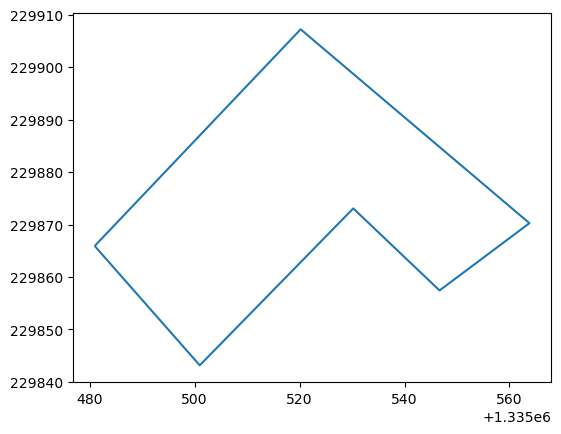

In [33]:
gdf.boundary.plot()

<Axes: >

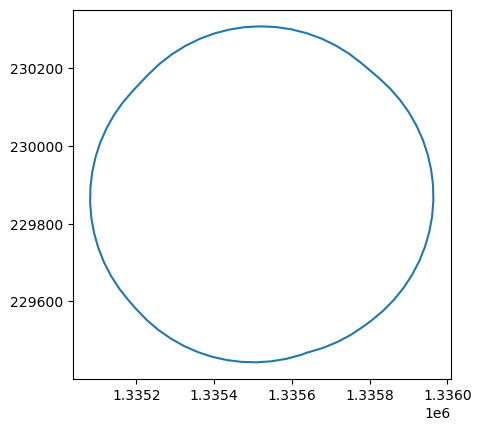

In [34]:
qd_arc.boundary.plot()

<Axes: >

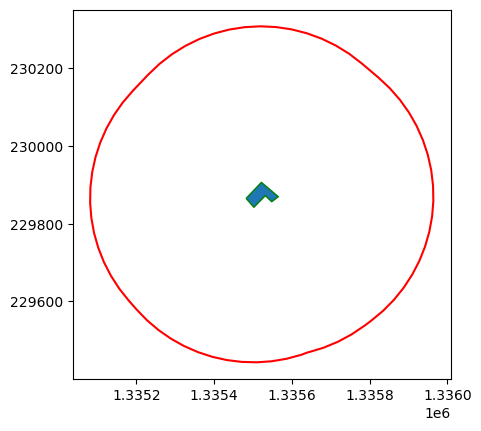

In [35]:
fig, ax = plt.subplots()
gdf.plot(ax = ax, edgecolor = 'green')
qd_arc.boundary.plot(ax = ax, edgecolor = 'red')

# add the original shapefile or polygon to the map
folium.GeoJson(gdf).add_to(m)

# add the QD buffer to the map
folium.GeoJson(gdf['QD 1']).add_to(m)

# add the buffers to the map
#for qd_type in qd_functions.keys():
#    buffer_name = 'Buffer ' + qd_type
#    folium.GeoJson(gdf[[buffer_name]]).add_to(m)
